In [1]:
# Exploratory data analysis
import warnings  
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where
from pathlib import Path

In [2]:
# Import training data
train = pd.read_csv("../data-sets/train.csv")

Accuracy: 0.5891390020706699
Confusion Matrix:
 [[1807 2422   88]
 [1033 6556  433]
 [  43 2132  457]]
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.42      0.50      4317
           2       0.59      0.82      0.69      8022
           3       0.47      0.17      0.25      2632

    accuracy                           0.59     14971
   macro avg       0.56      0.47      0.48     14971
weighted avg       0.58      0.59      0.56     14971



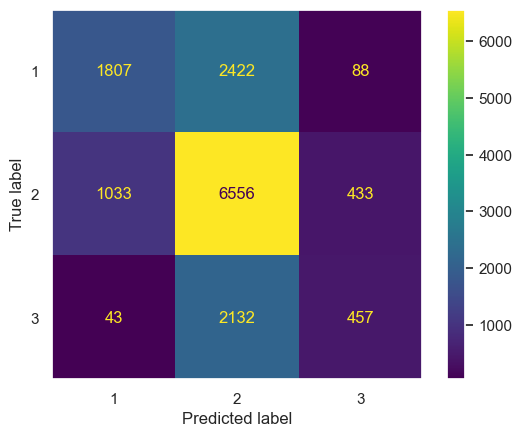

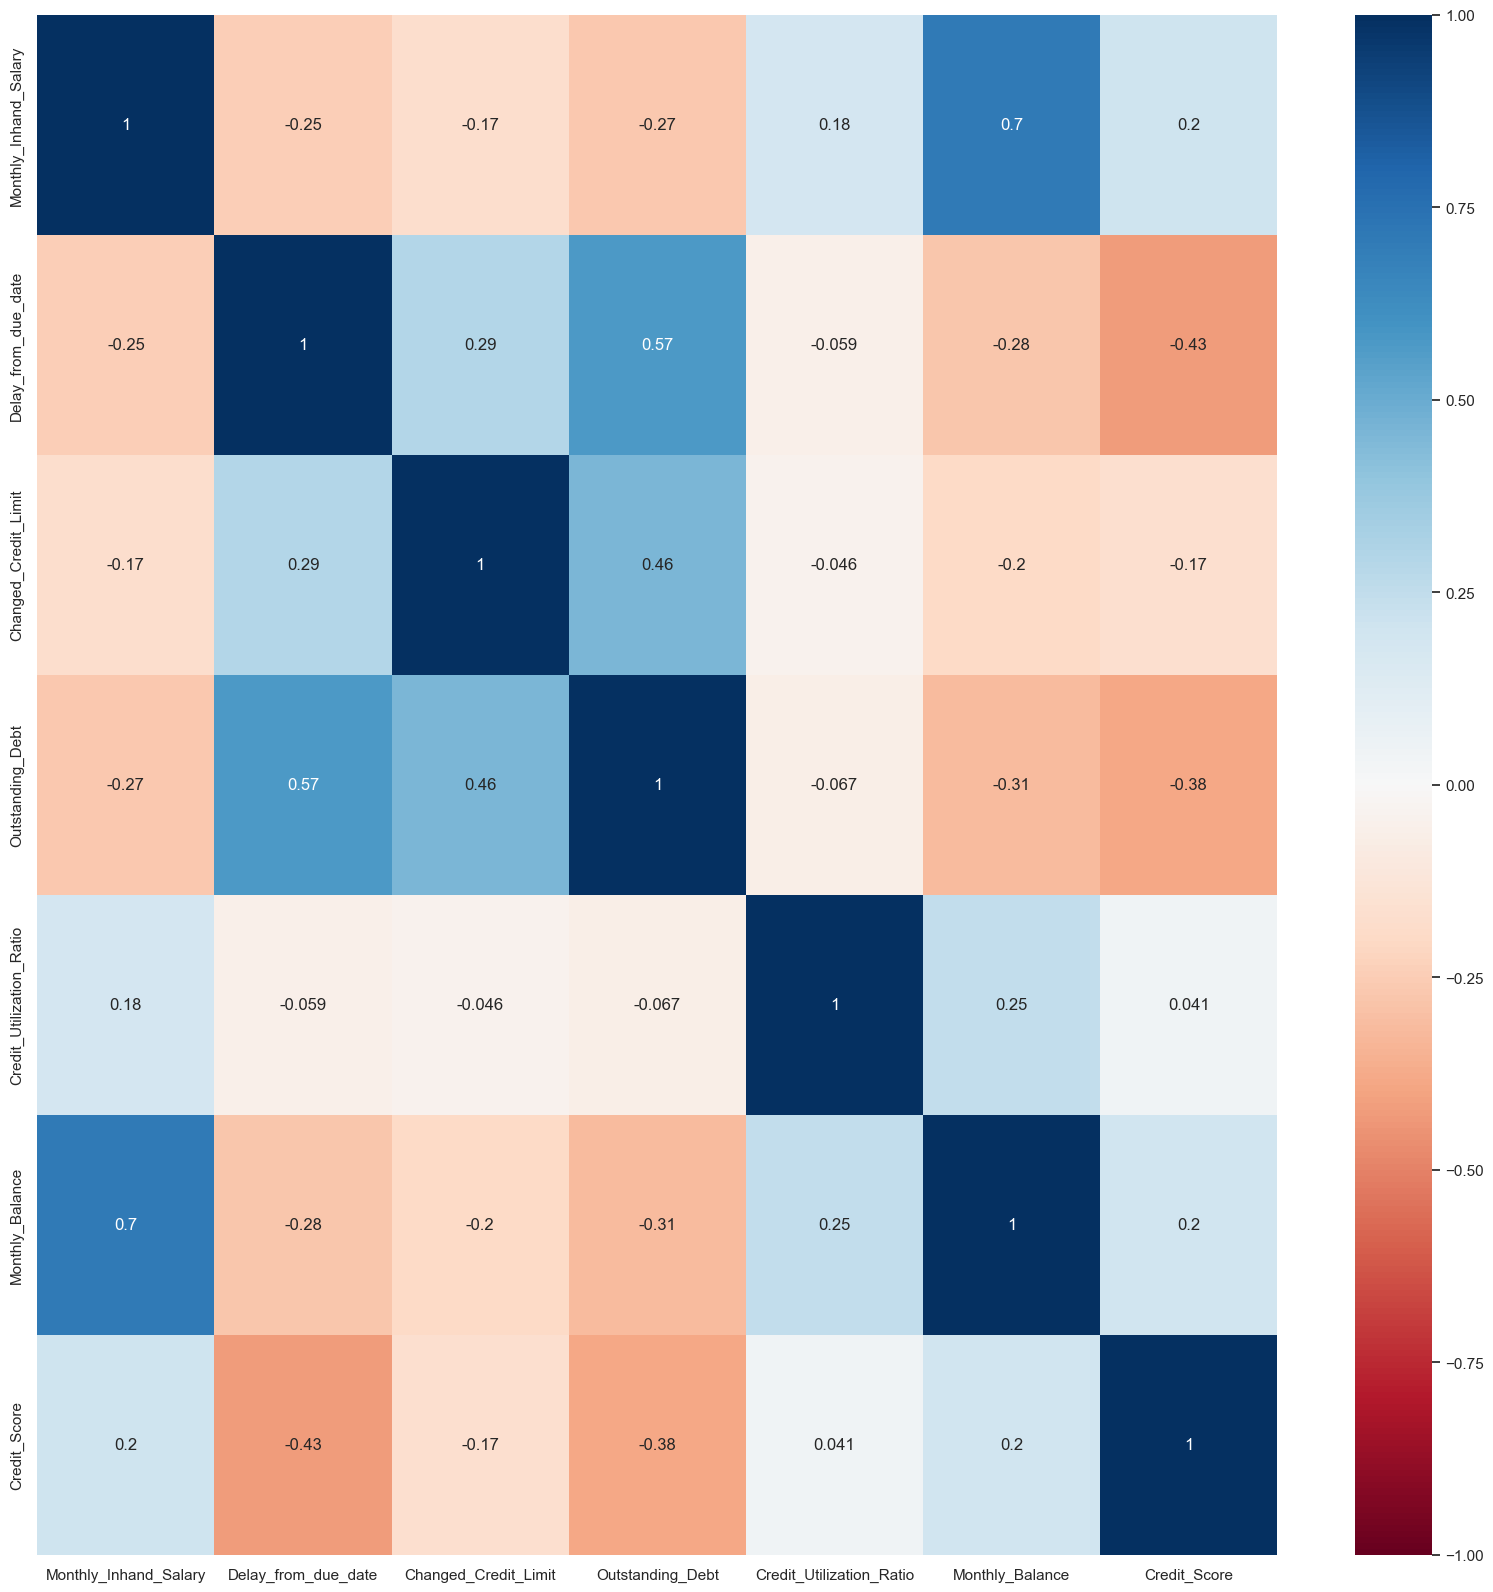

In [3]:
# Columns to drop
drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
        'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',  'Num_Credit_Inquiries',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Num_of_Delayed_Payment']

# Columns to clean
clean = ['Delay_from_due_date', 'Monthly_Inhand_Salary', 'Monthly_Balance', 'Changed_Credit_Limit','Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age']

# Clean columns
for item in clean:
    train[item] = pd.to_numeric(train[item], errors='coerce')

# Map credit scores to number
creditScoreMap = {'Poor': 1, 'Standard': 2, 'Good': 3}
train['Credit_Score'] = train['Credit_Score'].replace(creditScoreMap)


data = train.copy().drop(columns=drop)
# Drop entries with NaN values
data.dropna(inplace=True)
# Separate features (X) and target variable (y)
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
predictions = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, predictions))

ConfusionMatrixDisplay(cm,display_labels=logreg.classes_).plot()
plt.grid(False)
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu')
plt.show()